In [1]:
import json

In [2]:
with open('exp/results/knn_raw.json', 'r') as f:
    knn_raw = json.load(f)
assert isinstance(knn_raw, dict)

In [3]:
with open('exp/results/knn_diff.json', 'r') as f:
    knn_diff = json.load(f)
assert isinstance(knn_diff, dict)

In [4]:
with open('exp/results/knn_dist_diff.json', 'r') as f:
    knn_dist_diff = json.load(f)
assert isinstance(knn_dist_diff, dict)

In [5]:
def dfs(node, data, result, black_list, dist_method='minkowski'):
    black_list.append(node)
    for adj_node in data[node][dist_method]:
        if adj_node not in black_list:
            result.append(adj_node)
            dfs(adj_node, knn_raw, result, black_list, dist_method)

In [6]:
origin = 'Vietnam'
distance_methods = ['minkowski', 'manhattan']

In [7]:
raw_result = {}

for method in distance_methods:
    raw_result[method] = []
    black_list = []
    dfs(origin, knn_raw, raw_result[method], black_list, method)

print(raw_result)

{'minkowski': ['Cambodia', 'Laos'], 'manhattan': ['Australia', 'Dominica', 'Canada']}


In [8]:
diff_result = {}

for method in distance_methods:
    diff_result[method] = []
    black_list = []
    dfs(origin, knn_diff, diff_result[method], black_list, method)

print(diff_result)

{'minkowski': ['Fiji', 'Cambodia', 'Laos'], 'manhattan': ['Canada', 'Australia', 'Dominica']}


In [9]:
dist_diff_result = {}

for method in distance_methods:
    dist_diff_result[method] = []
    black_list = []
    dfs(origin, knn_dist_diff, dist_diff_result[method], black_list, method)

print(dist_diff_result)

{'minkowski': ['Bolivia', 'Cambodia', 'Laos'], 'manhattan': ['Bolivia', 'United Kingdom', 'Australia', 'Dominica', 'Canada']}


In [12]:
from utils import data
import os

In [16]:
BASE_PATH = "COVID-19/csse_covid_19_data/"
confirmed = os.path.join(
    BASE_PATH, 
    'csse_covid_19_time_series',
    'time_series_covid19_confirmed_global.csv'
)
confirmed = data.load_csv_data(confirmed)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(result):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    cm = plt.get_cmap('jet')
    LINE_STYLES = ['dotted', 'dashed']

    handles = []
    legend = []
    
    
    df = confirmed[confirmed['Country/Region'] == 'Vietnam']
    cases, labels = data.get_cases_chronologically(df)
    cases = cases.sum(axis=0)
    lines = ax.plot(cases, label=labels[0,1])
    lines[0].set_linestyle('solid')
    lines[0].set_color('red')
    handles.append(lines[0])
    legend.append(labels[0,1])
    
    for i, method in enumerate(distance_methods):
        for j, val in enumerate(result[method]):
            df = data.filter_by_attribute(
                confirmed, 'Country/Region', val
            )

            cases, labels = data.get_cases_chronologically(df)
            cases = cases.sum(axis=0)

            lines = ax.plot(cases, label=f"{method}: {labels[0,1]}")
            lines[0].set_linestyle(LINE_STYLES[i%2])

            handles.append(lines[0])
            legend.append(f"{method}: {labels[0,1]}")

    ax.set_ylabel('# of confirmed cases')
    ax.set_xlabel('Time (days since Jan 22, 2020)')

    ax.set_yscale('log')
    ax.legend(handles, legend, bbox_to_anchor=(0., 1.05, 1., .102), loc=3, ncol=2)

    fig.tight_layout()
    plt.show()

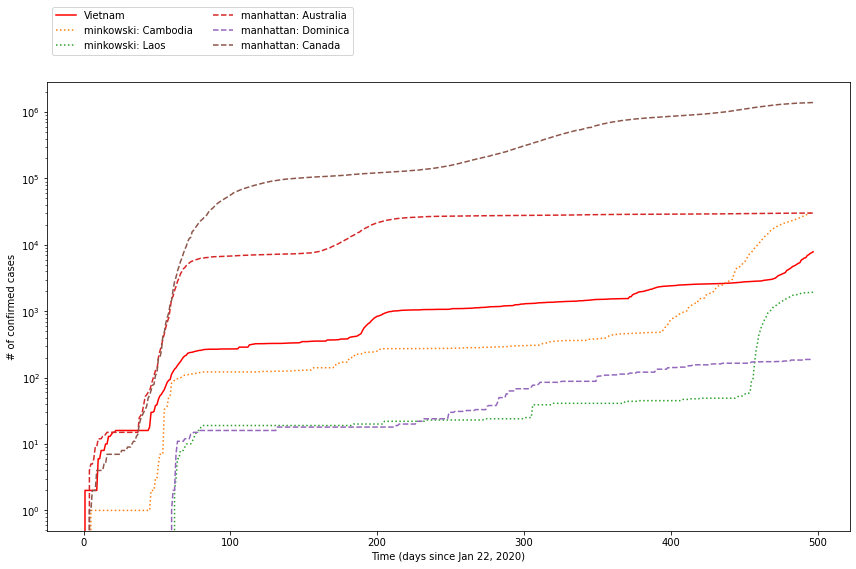

In [59]:
plot_results(raw_result)

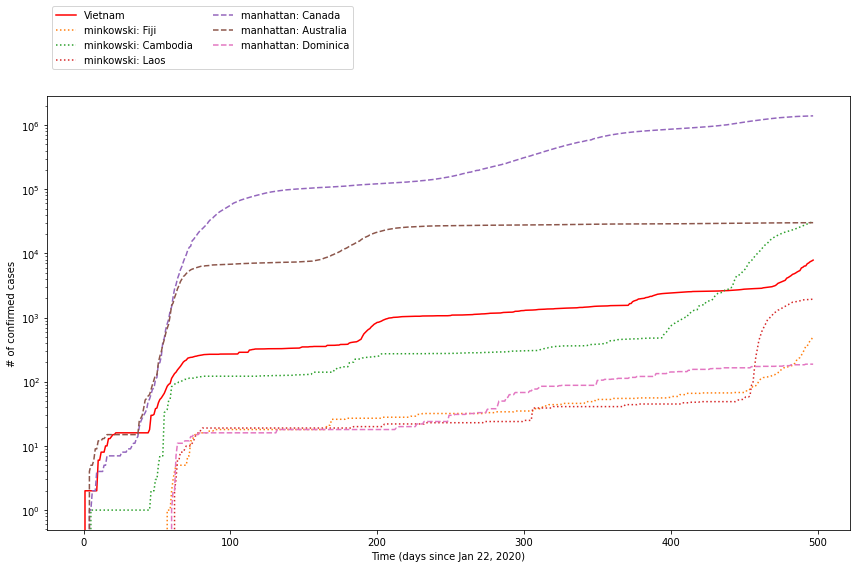

In [60]:
plot_results(diff_result)

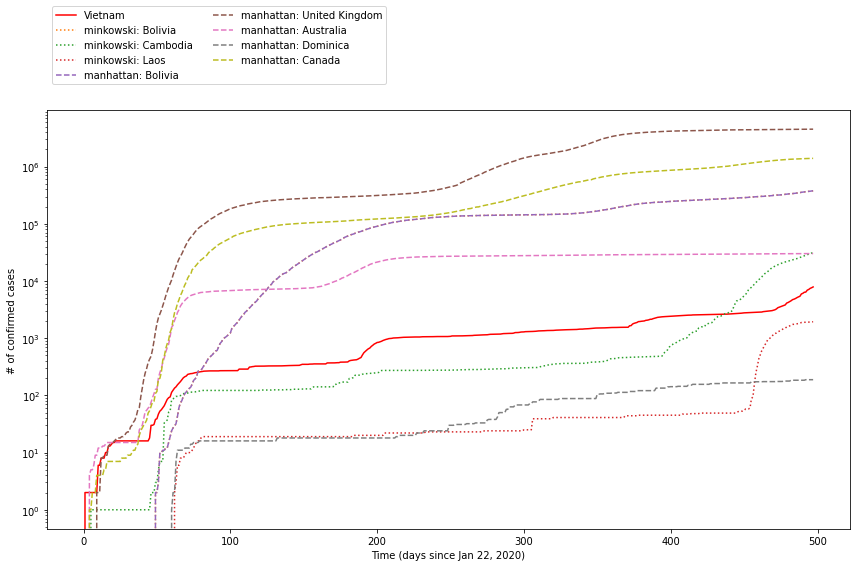

In [61]:
plot_results(dist_diff_result)